Last modified: Oct 2020

Author: Miguel V. Martin for ML course, based on Geron

We will use our usual attributes_vs_salary dataset. This is a very shallow dataset but we only use it to illustrate concepts

In [189]:
import pandas as pd
url = 'https://raw.githubusercontent.com/miguevmartin/INFR3700/master/attributes_vs_salary.dat'
sal_data = pd.read_csv(url)
#sal_data["Hobby_cat"] = sal_data["Hobby"].astype('category')
#sal_data.drop('Hobby') OR:
sal_data['Hobby'].value_counts()

running      18
cycling       7
handcraft     7
tv            7
reading       3
writing       2
cooking       2
biking        2
swimming      1
soccer        1
Name: Hobby, dtype: int64

We will predict the hobby, which is categorical, se we need to convert it to numerical values

In [190]:
hobby_codes = {'Hobby': {"running": 0, "cycling": 1, "handcraft": 2, "tv": 3, "reading": 4, 
                         "writing": 5, "cooking": 6, "biking": 7, "swimming": 8, "soccer": 9}}
sal_data.replace(hobby_codes, inplace=True)
sal_data.head()

,Person,Years of education,Age,Years of experience,GPA,Hobby,Income ($K/year)
0,1,16,35.0,8,3.50,9,101
1,2,24,38.0,10,2.80,7,126
2,3,23,45.0,16,3.00,4,180
3,4,17,27.0,2,4.00,6,61
4,5,0,22.0,15,1.98,5,60


Next, we apply our usual split but this time we do a 50/50 split to match the size of the training set with the validation set

In [191]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sal_data, test_size=0.5)#, random_state=42)
train_labels = train.iloc[:,-1]
train_data = train.drop(['Person','Hobby'], axis=1)
test_labels = test.iloc[:,-1]
test_data = test.drop(['Person','Hobby'], axis=1)
# For multiclass classification, we will use 'Hobby' as the target
train_labels_mc = train['Hobby']
test_labels_mc = test['Hobby']

Scale as usual:

In [192]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(train_data)

Let's see the versions available in Colab

In [193]:
import tensorflow as tf
from tensorflow import keras
print('tf version:',tf.__version__, 'keras version:',keras.__version__)

tf version: 2.3.0 keras version: 2.4.0


Then we create a fully connected neural network

In [206]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[5]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

Visualize the model:

In [207]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_57 (Dense)             (None, 300)               1800      
_________________________________________________________________
dense_58 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                1010      
Total params: 32,910
Trainable params: 32,910
Non-trainable params: 0
_________________________________________________________________


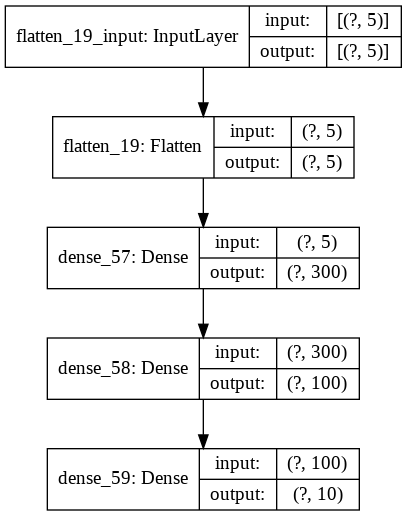

In [208]:
keras.utils.plot_model(model, "attributes_vs_salary_model.png", show_shapes=True) # Try rankdir = 'LR'

And then establish loss, optimizer, and metric

In [195]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

We will use the history object to create a graph

In [196]:
history = model.fit(train_data, train_labels_mc, epochs=100, validation_data=(test_data, test_labels_mc), verbose=0)# Turn verbose=1 to printing epochs

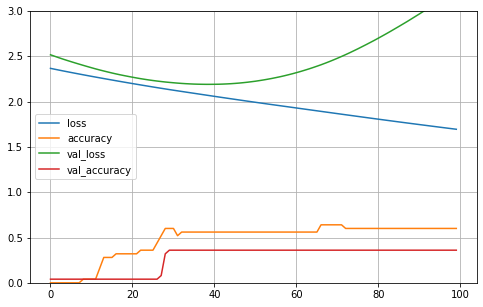

In [197]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)
plt.show()